In [44]:
import numpy as np
from scipy.stats import norm
from scipy.stats import multivariate_normal

In [30]:
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib notebook
plt.rcParams['figure.figsize']= (6,4)
plt.rcParams['figure.dpi']=150

In [31]:
from mpl_toolkits.mplot3d import Axes3D

In [32]:
data = np.loadtxt('dataset_FLD.csv', delimiter=",")

In [33]:
Ydata = data[:,-1]
inds = np.where(Ydata == 1)
inds = inds[0]
Pdata = data[inds]
inds = np.where(Ydata == 0)
inds = inds[0]
Ndata = data[inds]
Pdata= Pdata[:,:-1] #positive examples
Ndata= Ndata[:,:-1] #negative examples

In [34]:
meanPdata = np.mean(Pdata,axis =0)
meanPdata = meanPdata.reshape((1,meanPdata.size))
meanPdata #mean of positive examples

array([[0.22310309, 0.00255859, 1.01027072]])

In [35]:
meanNdata = np.mean(Ndata,axis =0)
meanNdata = meanNdata.reshape((1,meanNdata.size))
meanNdata #mean of negative examples

array([[ 0.10229483,  0.10337021, -1.00513   ]])

In [36]:
Sw = np.matmul((Pdata-meanPdata).transpose(),(Pdata-meanPdata)) + np.matmul((Ndata-meanNdata).transpose(),(Ndata-meanNdata))
Sw

array([[9061.37742888,  -98.60076737,   62.96379808],
       [ -98.60076737,  986.20155992,   12.88886716],
       [  62.96379808,   12.88886716,   89.68373253]])

In [37]:
w = np.matmul(np.linalg.inv(Sw),(meanNdata-meanPdata).transpose())
w 

array([[ 0.00014845],
       [ 0.0004129 ],
       [-0.02263587]])

In [38]:
one_d_Pdata = np.matmul(Pdata,w).reshape((Pdata.shape[0],))
one_d_Ndata = np.matmul(Ndata,w).reshape((Ndata.shape[0],))       # data corresponding to all the points after projecting them on to w 
one_d_data = np.matmul(data[:,:-1],w).reshape((data.shape[0],))


<IPython.core.display.Javascript object>


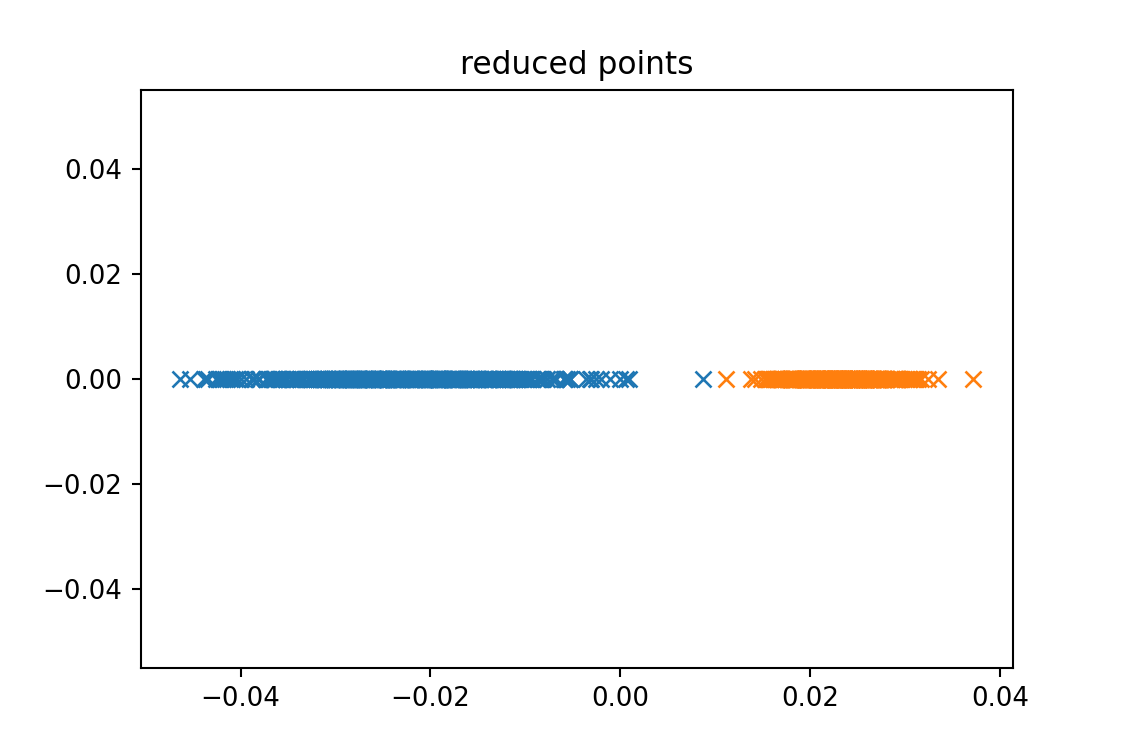

In [39]:
plt.plot(list(one_d_Pdata), np.zeros_like(list(one_d_Pdata)),'x')
plt.plot(list(one_d_Ndata), np.zeros_like(list(one_d_Ndata)),'x')
plt.title('reduced points')
plt.show()

In [40]:
#it calculates the intersection between two normal distributions
def get_intersection(muP,varP,muN,varN):
    p = np.array([(varN**2-varP**2),2*(muN*(varP**2)-muP*(varN**2)),
                  ((muP*varN)**2 - (muN*varP)**2)-2*(((varN*varP)**2)*np.log(varN/varP))])
    return np.roots(p)

<IPython.core.display.Javascript object>


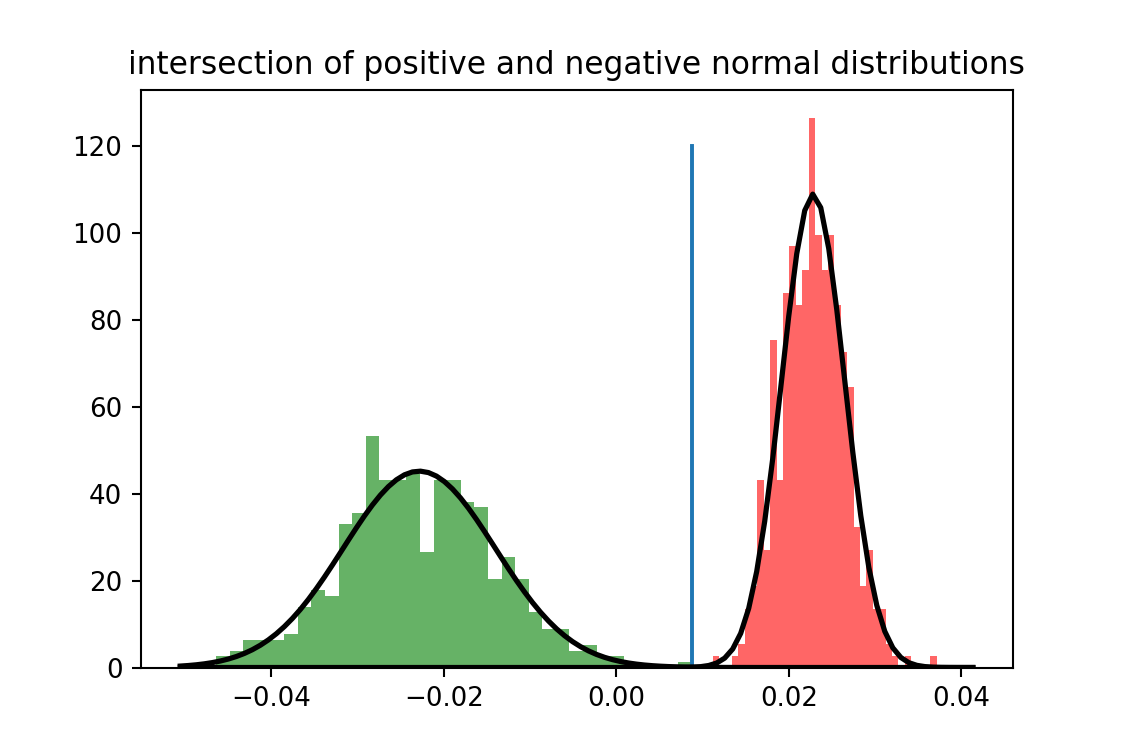

0.0729131452160533


In [41]:

muP, stdP = norm.fit(one_d_Pdata)
muN, stdN = norm.fit(one_d_Ndata) #fitting normal distribution to positive and negative data

plt.hist(one_d_Pdata, bins=35, density=True, alpha=0.6, color='g')
plt.hist(one_d_Ndata, bins=35, density=True, alpha=0.6, color='r') #ploting histograms

xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100)
pP = norm.pdf(x, muP, stdP)
pN = norm.pdf(x, muN, stdN)
intersectPoint = get_intersection(muP,stdP,muN,stdN)
p = norm.pdf(intersectPoint[1], muP, stdP)
print(p)
plt.plot([intersectPoint[1],intersectPoint[1],intersectPoint[1]],[0,p,120])  #plotting a line passing through intersection
plt.plot(x, pP, 'k', linewidth=2)
plt.plot(x, pN, 'k', linewidth=2)# ploting normal distributions

plt.title('intersection of positive and negative normal distributions')
plt.show()


<IPython.core.display.Javascript object>


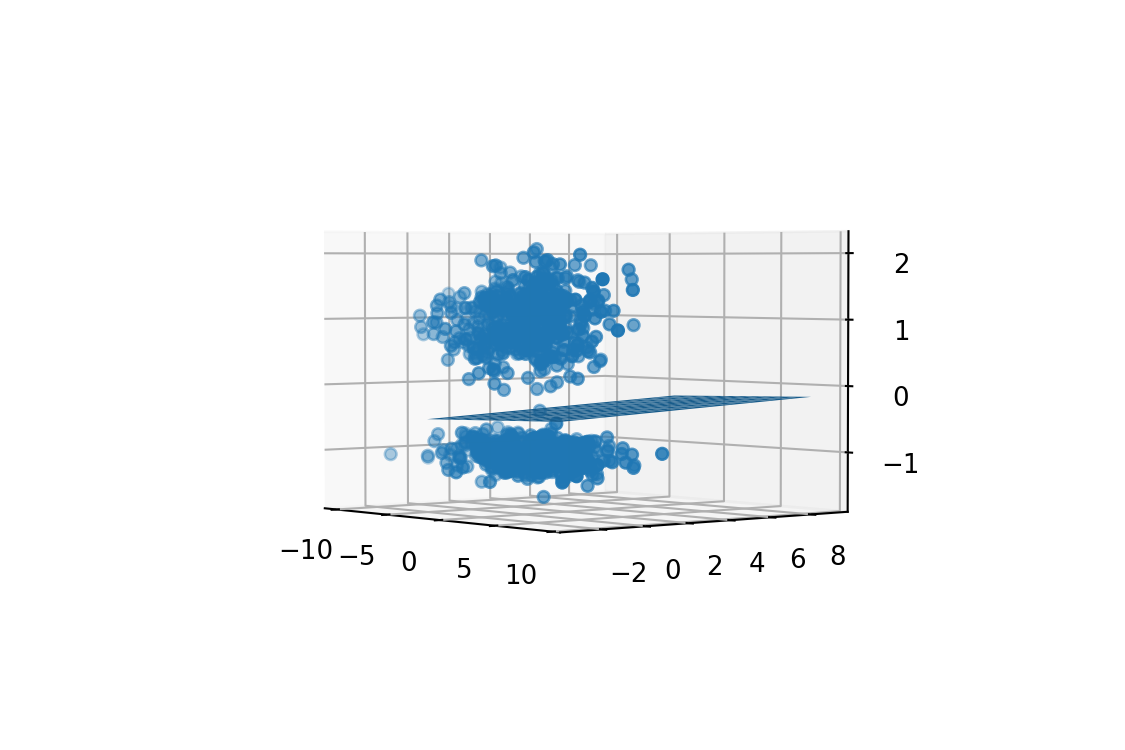

In [42]:
#ploting 3d linear discriminator 
x = data[:,0]
y = data[:,1]
z = data[:,2]
x1 ,y1 = np.meshgrid(range(-3,10), range(-3,10))
z1 = (intersectPoint[1] - w[0,0]*x1 - w[1,0]*y1)/w[2,0]
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z)
ax.plot_surface(x1, y1, z1, alpha=1)

# x = data[:,0]
# y = data[:,1]
# z = data[:,2]
# x1 ,y1 = np.meshgrid(range(10), range(10))
# z1 = (intersectPoint[1] - w[0,0]*x1 - w[1,0]*y1)/w[2,0]

# plt3d = plt.figure().gca(projection='3d')
# plt3d.plot_surface(x1, y1, z1, alpha=0.2)
# ax = plt.gca()
# ax.hold(True)
# ax.scatter(x,y,z)
